# Predicting heart disease using machine learning

## 1. Problem Definition

Given clinical parameters about a patient, predicting whether or not the patient has heart disease.

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Reporsitory (Link: https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

We collected a subset of the dataset with 14 features from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci)

## 3. Features
The features of this dataset are explained below-

**create data dictionary**
* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Aysmptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital): anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to servere problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with exercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
* thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect (used to be defect but ok now)
    - 7: reversable defect (no proper blood movement when excercising)
* target - have disease or not (1=yes, 0=no) (=the predicted attribute)

# Initializing
The different python libraries used in the code are initialized below

In [ ]:
# For Data Analysis and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from keras for Neural Netowrks
from keras.models import Sequential
from keras.layers import Dense

# For Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Loading data from url

In [ ]:
url = "https://raw.githubusercontent.com/Sabila-Nawshin/ML-Playground/main/Heart-Disease-Prediction/heart.csv"
df = pd.read_csv(url, comment="#")
df.shape # Shows (rows, columns)

(303, 14)

## Data Exploration

In [ ]:
df.head() #Observing the first five rows of the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Counting the classes (Heart disease (1) vs No heart disease (0))
1    165
0    138
Name: target, dtype: int64


Now plotting that on graph to observe clearly


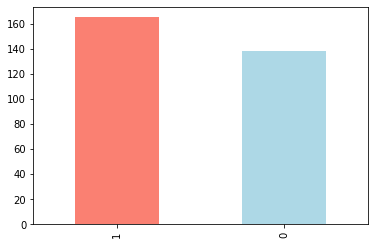

In [ ]:
print("Counting the classes (Heart disease (1) vs No heart disease (0))")
print(df["target"].value_counts())

print("\n\nNow plotting that on graph to observe clearly")
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [ ]:
print("Number of Missing Values (in each column) in dataset")
df.isna().sum()

Number of Missing Values (in each column) in dataset


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

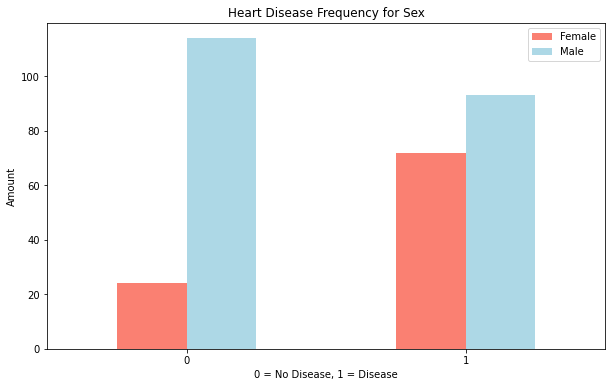

In [ ]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

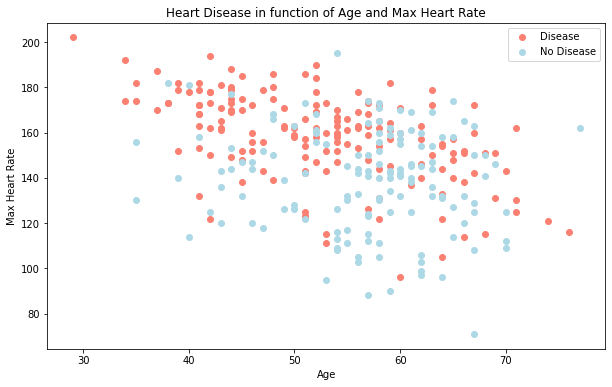

In [ ]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

Distribution of the age column in dataset


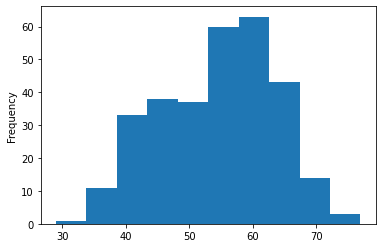

In [ ]:
# Check the distribution of the age column with a histogram
print("Distribution of the age column in dataset")
df.age.plot.hist();

- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs or disease


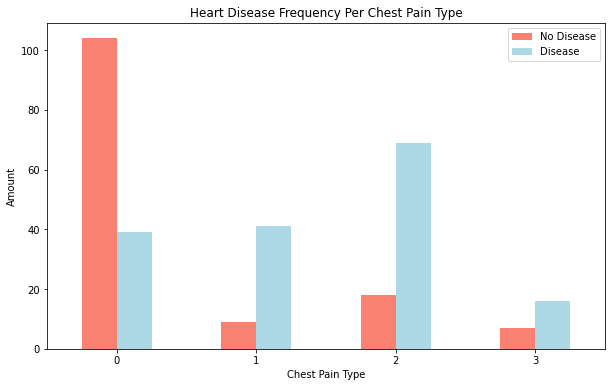

In [ ]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

print("- 0: Typical angina: chest pain related decrease blood supply to the heart\n- 1: Atypical angina: chest pain not related to heart\n- 2: Non-anginal pain: typically esophageal spasms (non heart related)\n- 3: Asymptomatic: chest pain not showing signs or disease")

#Modelling 

In [ ]:
# Split data into X and y (for training)
X = df.drop("target", axis=1)
y = df["target"]

Splitting data into train & test set, with 20% of the data on test set and 80% on train set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


Now we've got our data split into training and test sets, it's time to build a machine learning model. We'll train it (find the patterns) on the trainig set, test it (use the patterns to predict) on the test set, and then evaluate how much of the data the model correctly classified.

We are going to use a very simple Neural Network Model with a input layer, 2 hidden layers and an output layer.

* 1st layer (Input Layer) - a dense neural network layer that takes initial input and puts it through 30 neurons (activation function - tanh)

* 2nd layer (1st hidden layer) - a dense neural network layer with 20 neurons (activation function - tanh)

* 3nd layer (2st hidden layer) - a dense neural network layer with 20 neurons (activation function - tanh)

* 4th layer (output layer) - takes in 20 input from the previous layer and puts it through a single neuron with sigmoid activation function to provide prediction

We will be declaring our model now.

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

Compiling and fitting the model on dataset (The model will train for 300 iterations or epochs)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5172
Epoch 2/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5560
Epoch 3/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5394
Epoch 4/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6145
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5682
Epoch 6/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6142
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5777
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.6087
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.5975
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.5965
Epoch 11/300
8/8 [===========

A summary of the model and acheived accuracy on test set





In [ ]:
model.summary()
score = model.evaluate(X_test, y_test)
print('Model Accuracy = ',score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 6ms/step - loss: 0.5862 - accuracy: 0.7869
Model Accuracy =  0.7868852615356445


## Evaluation
* Receiver Operating Characteristic (ROC) curve and Area Under Curve (AUC score)
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

First, we will make predictions using the model we built, Plot ROC curve and calculate AUC metric


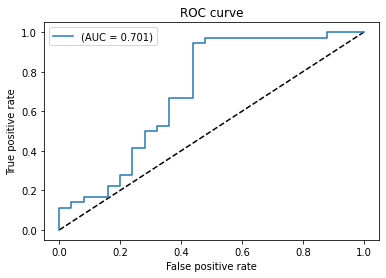

In [ ]:
y_pred = model.predict(X_test).ravel()

#Finding ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

# Calculating AUC
auc_nn = auc(false_positive_rate, true_positive_rate)

# plotting ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label='(AUC = {:.3f})'.format(auc_nn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Calculating and plotting confusion Matrix

[[13 12]
 [ 1 35]]


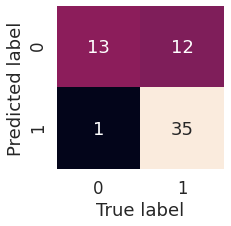

In [ ]:
#The prediction is given on probabilties, like 40% (0.4) or 80% (0.8) probabilities of having a heart disease. We will need to make the numbers (o.4, 0.8) 0 and 1 for binary class classification first
pred = []
for i in y_pred:
  if i > 0.5:
    pred.append(1)
  else:
    pred.append(0)


#Caculating and prinintng the values of confusion matrix
print(confusion_matrix(y_test, pred))

#plotting confusing matrix nicely
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim()
    
plot_conf_mat(y_test, pred)

Finally, a classification report with cross-validated precision, recall and f1-score.

In [ ]:
print(classification_report(y_test, pred))